**Linear Regression california house price predictions using scikit-learn**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load california housing dataset
california = fetch_california_housing()
X =pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

#Combine feature and data for exploration
df = pd.concat([X, pd.Series(y, name='MedHouseVal')], axis=1)
print("\nFirst five rows of datset :")
df.head()


First five rows of datset :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Here is a **short, clear explanation** you can put in your Colab text
### 📝 Why we use `df.info()` in our code

`df.info()` gives a quick overview of the dataset’s structure. It shows:

* **Column names**
* **Number of rows**
* **Data types of each feature**
* **How many missing values each column has**
* **Memory usage**

This helps us understand:

* whether any columns need **type conversion** (e.g., float ↔ int)
* which features might need **imputation** because of missing values
* if the dataset is loaded **correctly** before starting EDA or preprocessing

In simple words:
➡️ **`df.info()` is used to quickly inspect the dataset so we know what cleaning or preprocessing is needed.**



In [33]:
print("Dataset Info: ")
df.info()


Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [34]:
print("Shape of dataset:", df.shape)

Shape of dataset: (20640, 9)



### 📝 Why we use `df.describe()` in our code

`df.describe()` provides key **summary statistics** for all numerical columns, including:

* **mean**
* **median (50% percentile)**
* **min & max values**
* **standard deviation**
* **25% and 75% percentiles**

This helps us quickly understand:

* the **distribution** of each feature
* whether any values look **unusual or extreme** (outliers)
* the **scale** of the features (useful before normalization or standardization)
* if the dataset is **balanced** or skewed

In simple words:
➡️ **`df.describe()` gives a quick statistical summary to help us check data quality and plan preprocessing.**




In [35]:
print("Summary statistics:\n")
df.describe()

Summary statistics:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Nice — below is a **clean, robust, copy-pasteable update** of your plotting code plus a **line-by-line explanation**. The updated version:

* automatically computes the grid size (rows × columns)
* uses `plt.subplots()` (better practice than many `plt.subplot()` calls)
* hides any unused subplots
* sets a sensible default `bins` value
* keeps `kde=True` so you get both histogram + density


### 📝 Line-by-line explanation

1. `import numpy as np`

   * Import NumPy for numeric utilities (used to compute rows/cols).

2. `import matplotlib.pyplot as plt`

   * Import Matplotlib's plotting interface.

3. `import seaborn as sns`

   * Import Seaborn for nicer statistical plots (histogram + KDE).

4. `n_features = len(X.columns)`

   * Count how many feature columns you have (so the code adapts if you add/remove features).

5. `n_cols = 3`

   * Choose how many columns you want in the subplot grid. Change this to `2`, `4`, etc., depending on how wide you want the layout.

6. `n_rows = int(np.ceil(n_features / n_cols))`

   * Compute the number of rows required to fit all features. `np.ceil` ensures we round up so every feature has a subplot.

7. `fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))`

   * Create the figure and a grid of axes (subplots). `figsize` scales with the grid so plots aren't cramped.

8. `axes = axes.flatten()`

   * Convert the 2D `axes` array into a flat 1D array — easier for single-loop iteration.

9. `for i, col in enumerate(X.columns):`

   * Loop over each feature column (index `i`, column name `col`).

10. `sns.histplot(df[col], kde=True, bins=30, ax=axes[i])`

    * Draw a histogram of the column values on the `i`-th axis.
    * `kde=True` overlays a smooth density estimate.
    * `bins=30` controls histogram resolution; change if needed.
    * `ax=axes[i]` directs the plot to the correct subplot.

11. `axes[i].set_title(f"Distribution of {col}")`

    * Set a readable title for each subplot (shows the feature name).

12. `axes[i].set_xlabel("")`

    * Optionally clear the x-axis label text for a cleaner look (useful when many subplots).

13. `for j in range(n_features, len(axes)):`

    * If the grid has more subplot slots than features, iterate over the extra axes indexes.

14. `axes[j].set_visible(False)`

    * Hide unused axes so there are no empty plots with ticks.

15. `plt.tight_layout()`

    * Adjust spacing so titles and axes don't overlap.

16. `plt.show()`

    * Render the figure.


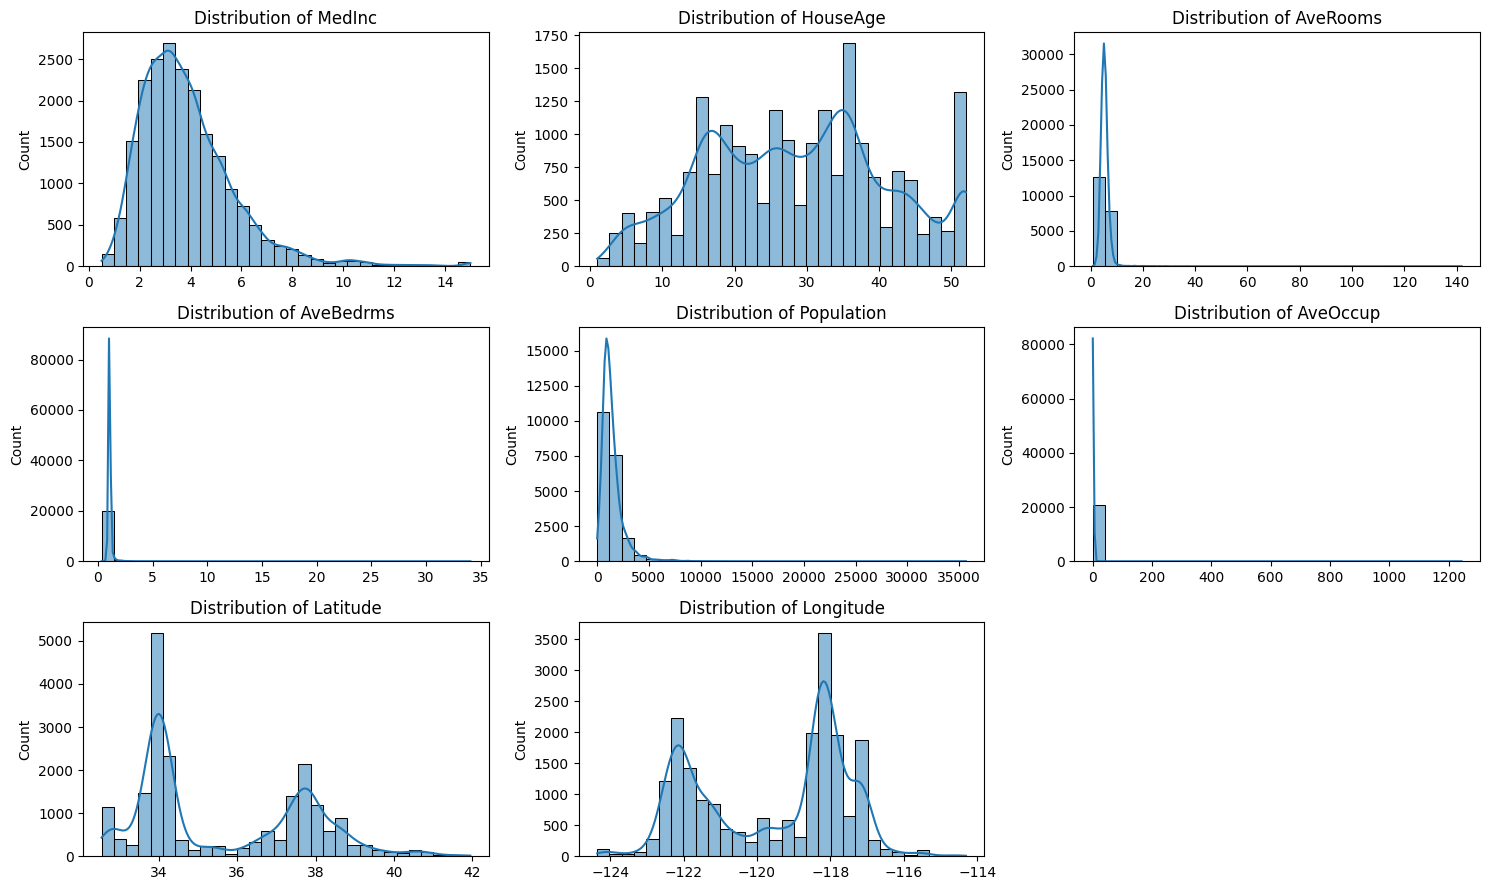

In [36]:

# number of features to plot
n_features = len(X.columns)

# layout: 3 columns (you can change this to 2, 4, etc.)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# create the figure and axes grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))
axes = axes.flatten()  # flatten so we can iterate in one loop

# loop over columns and plot each distribution
for i, col in enumerate(X.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")   # optional: remove x-label for cleaner look

# hide any unused subplots (if n_rows*n_cols > n_features)
for j in range(n_features, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


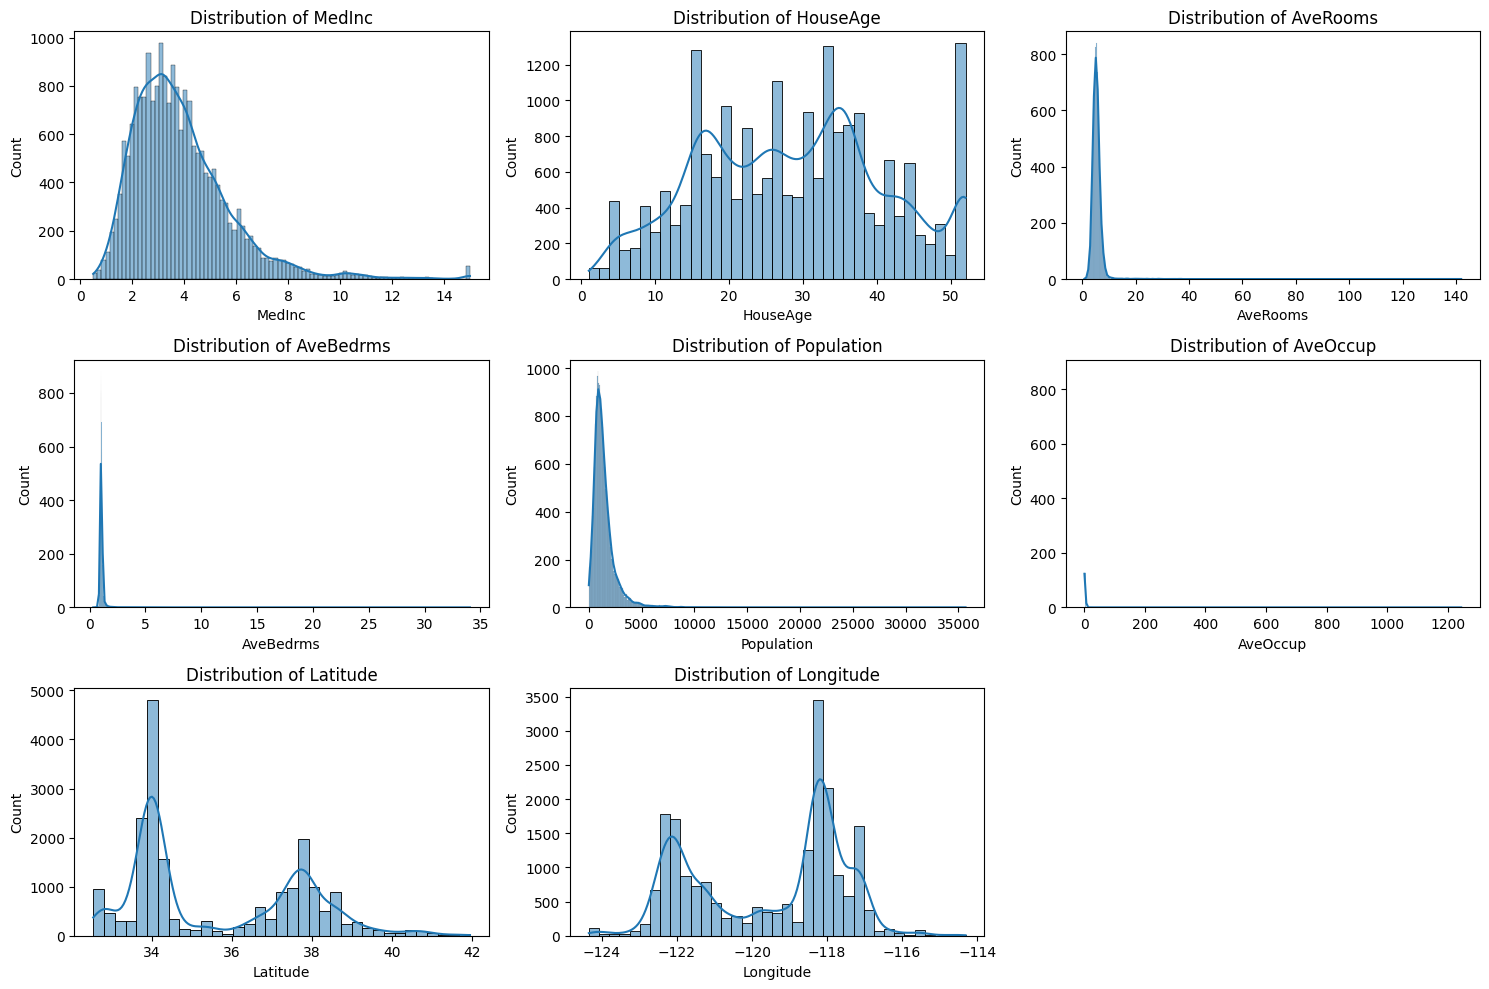

In [37]:
#Optional because this and prevoius are same
#Visualize feature distributions
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## 📝 Why we plot the distribution of the target variable?

Before training any regression model, we must understand how the **target variable** (here: *Median House Value*) is distributed.
Plotting the distribution helps us see:

* whether the target is **skewed** (common in housing prices)
* whether there are **outliers** that may affect model performance
* if we need **transformation** (log scaling) before training
* the overall **range** of house prices

In simple words:
➡️ **We use this plot to understand the shape of the target variable so we can choose better preprocessing and modeling techniques.**




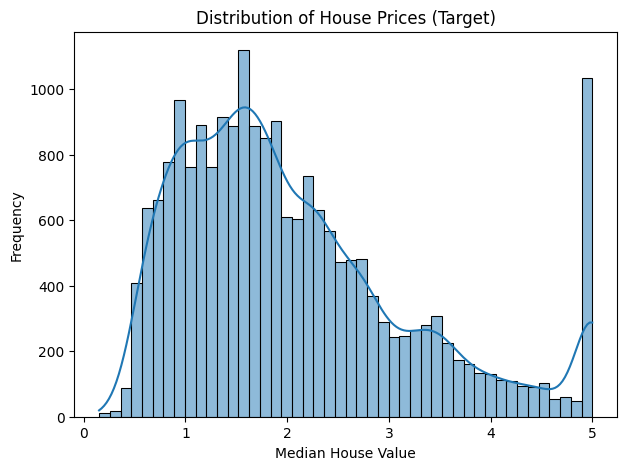

In [38]:
# Distribution of target (Median House Value)
plt.figure(figsize=(7,5))
sns.histplot(df["MedHouseVal"], kde=True)
plt.title("Distribution of House Prices (Target)")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


## 📝 Why we use a correlation heatmap?

A **correlation heatmap** shows how strongly each feature is related to:

* **other features** (to detect multicollinearity)
* **the target variable** (to see which features are useful for prediction)

This helps us:

* identify **important predictors**
* detect **highly correlated features** that may cause problems in linear models
* decide whether we need **feature selection** or **dimensionality reduction**
* understand patterns or relationships inside the data

In simple words:
➡️ **The heatmap helps us visually check which features are useful and which ones may create redundancy or noise.**

If you want, I can also generate:

✔ Heatmap with annotated correlation values
✔ Heatmap sorted by correlation with target
✔ Explanation of multicollinearity and how to fix it (VIF, PCA)

Just tell me!


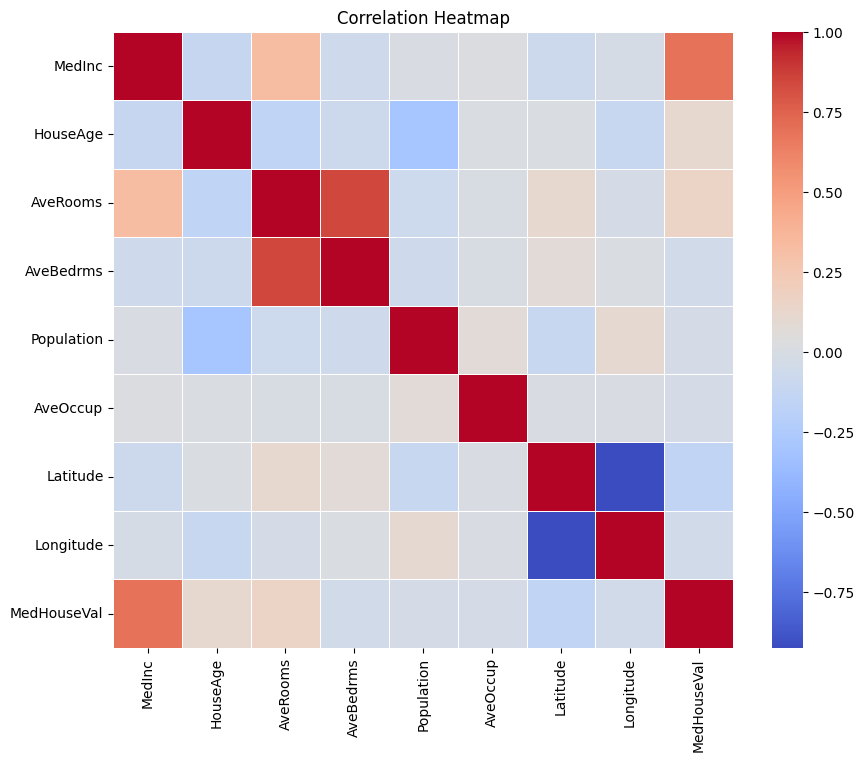

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()        # compute correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# 📝 What does “Testing Assumptions of Linear Regression” mean?

Linear Regression models work correctly **only when certain assumptions are satisfied**.
These assumptions help ensure that:

* predictions are accurate
* coefficients are reliable
* errors are stable and unbiased

Below is the meaning of each assumption in simple language:

---

### **1. Linearity — The relationship between features and target is linear**

This means:

* The target (y) changes proportionally with the features (X).
* A straight line (or plane) should fit the relationship well.

If the relationship is curved or non-linear, linear regression becomes inaccurate.

---

### **2. Independence — Observations are independent**

This means:

* Each data point must not influence another.
* No autocorrelation (especially important in time-series data).

If observations depend on each other, residuals become biased.

---

### **3. Homoscedasticity — Constant variance of residuals**

This means:

* The spread of residuals (errors) should be **constant** for all levels of prediction.
* No “funnel shape” patterns in residuals.

If variance increases or decreases, it indicates heteroscedasticity.

---

### **4. Normality — Residuals are normally distributed**

This means:

* The errors should follow a **bell-shaped distribution**.
* Important for accuracy of confidence intervals and hypothesis tests.

Not required for prediction but important for statistical interpretation.

---

### **5. No Multicollinearity — Features are not highly correlated**

This means:

* Predictors should not have very strong relationships with each other.
* Otherwise, the model cannot correctly estimate their individual effects.

High multicollinearity leads to unstable coefficients.

---

### ✔ In simple words:

> Linear regression works best when:
> features relate linearly to the target, data points don’t depend on each other,
> errors behave nicely (constant spread, normally distributed),
> and features aren’t too similar to each other.

---

If you want, I can generate Python code to **test all 5 assumptions** using:

* residual plots
* QQ plot
* VIF scores for multicollinearity
* Breusch-Pagan test
* Durbin-Watson test

Just tell me!


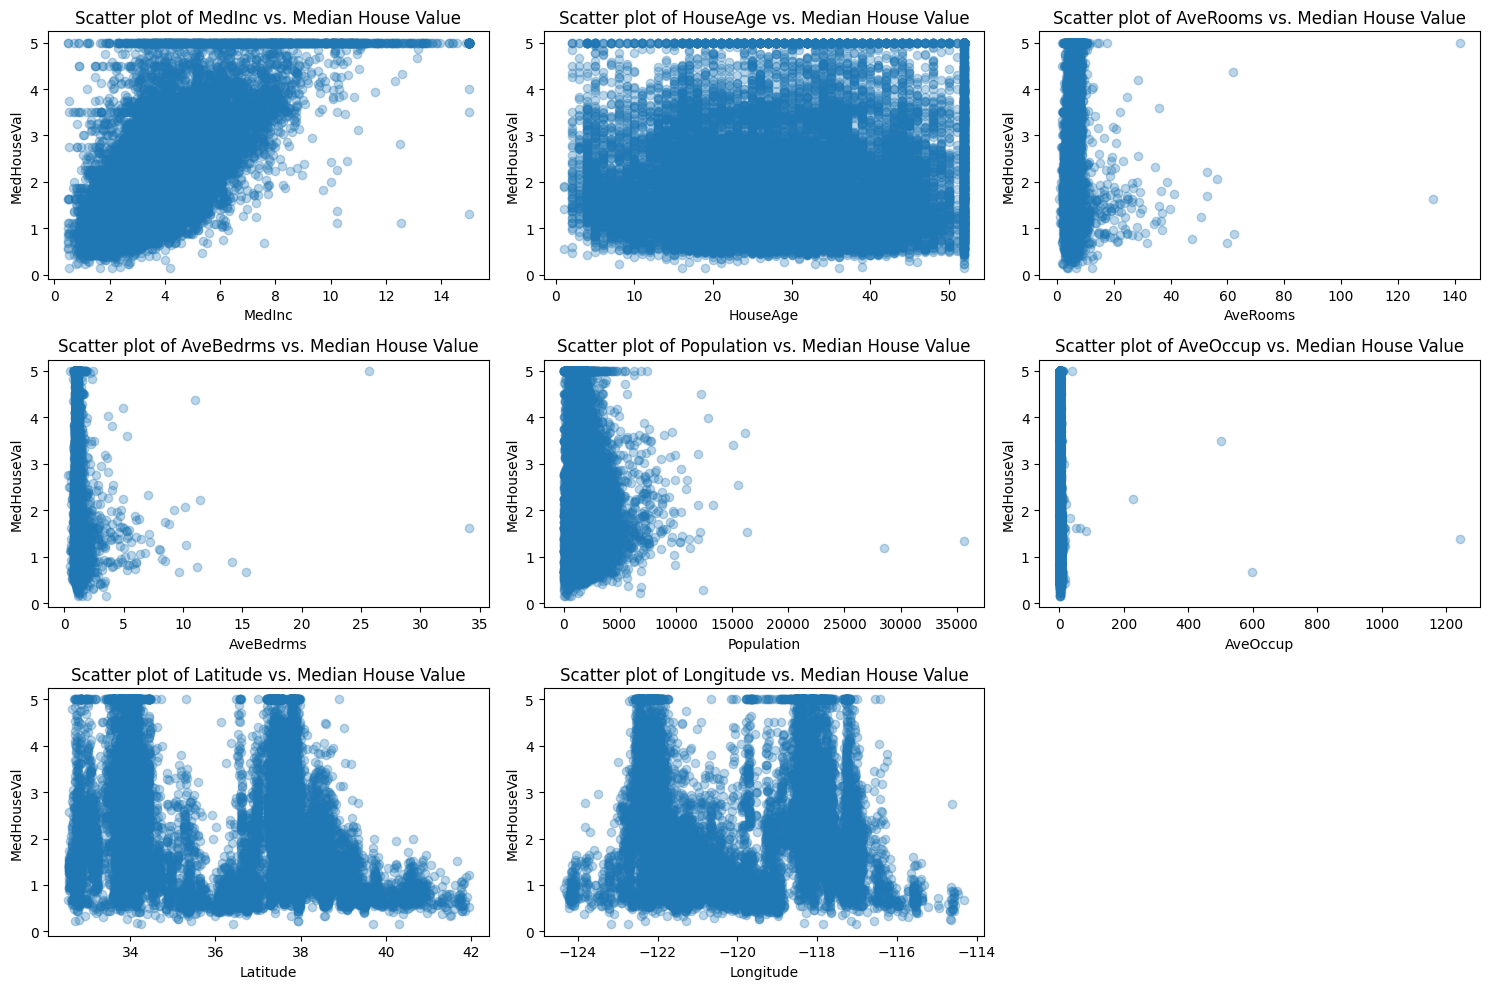

In [40]:
# ------------------------------------------------------------
# We create scatter plots to visually check the LINEARITY assumption.
# Linearity means each feature should have a roughly straight-line
# relationship with the target variable (MedHouseVal).
# ------------------------------------------------------------

# Create a large figure to fit all plots nicely
plt.figure(figsize=(15, 10))

# Loop through all feature columns in X
for i, col in enumerate(X.columns, 1):

    # Select the position of subplot (3 rows × 3 columns)
    plt.subplot(3, 3, i)

    # Scatter plot of feature vs. target
    # alpha=0.3 makes points transparent → helps see patterns clearly
    plt.scatter(df[col], df['MedHouseVal'], alpha=0.3)

    # Label the x-axis with feature name
    plt.xlabel(col)

    # Label the y-axis with target variable
    plt.ylabel('MedHouseVal')

    # Title explaining what the plot shows
    plt.title(f"Scatter plot of {col} vs. Median House Value")

# Adjust spacing between plots (prevents overlap)
plt.tight_layout()

# Show the entire grid of scatter plots
plt.show()


In [41]:
#Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n Variance Inflation Factor (VIF) :")
print(vif_data)


 Variance Inflation Factor (VIF) :
      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


**Building And Evaluation Simple Linear Regression model**

In [42]:
#split the data

# ------------------------------------------------------------
# Split the dataset into training and testing sets.
# We use this to evaluate how well the model generalizes.
# 80% data → training, 20% → testing.
# random_state=42 ensures same split every time (reproducibility).
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Optional scale features(not strictly necessary for linear regression but can help)

# ------------------------------------------------------------
# Import StandardScaler to scale/normalize features.
# Scaling helps Linear Regression when features have different units.
# Although LR doesn’t need scaling to work, it improves:
# - numerical stability
# - gradient-based optimization
# It is optional but recommended.
# ------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# ------------------------------------------------------------
# Fit the scaler on training data and transform it.
# We fit ONLY on training data to avoid data leakage.
# ------------------------------------------------------------
X_train_scaled = scaler.fit_transform(X_train)

# ------------------------------------------------------------
# Transform the test data using the SAME scaler.
# We do NOT fit on test data.
# ------------------------------------------------------------

X_test_scaled = scaler.transform(X_test)


In [43]:
#Initialize and fit the model

# ------------------------------------------------------------
# Initialize the Linear Regression model.
# This model tries to fit a straight-line relationship between
# features and the target.
# ------------------------------------------------------------
model = LinearRegression()

# ------------------------------------------------------------
# Train (fit) the model on scaled training data.
# The model learns coefficients for each feature here.
# ------------------------------------------------------------
model.fit(X_train_scaled, y_train)

# Make prediction
# ------------------------------------------------------------
# Make predictions (model output) using the test data.
# These predictions will be compared to actual values of test set.
# ------------------------------------------------------------
y_pred = model.predict(X_test_scaled)

#Evaluate the model
# ------------------------------------------------------------
# Evaluate the model using two metrics:
# - Mean Squared Error (MSE): measures avg squared error → lower is better
# - R-squared: measures how much variance is explained → closer to 1 is better
# ------------------------------------------------------------

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


#Display coefficients
# ------------------------------------------------------------
# Display the learned coefficients for each feature.
# This helps interpret how each feature affects house price.
# Positive coef → increases price
# Negative coef → decreases price
# ------------------------------------------------------------

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n Coefficients:")
print(coefficients)

Model Performance
Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451

 Coefficients:
      Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


### ✅ **Short Explanation of Results**

**Model Performance**

* **MSE = 0.556**
  → On average, the model’s predictions deviate from actual values by a moderate amount.
  → Lower MSE = better. Here it shows **some error remains**, meaning data is not perfectly linear.

* **R² = 0.576**
  → About **57.6% of the variance** in *Median House Value* is explained by the model.
  → This indicates a **medium-strength linear relationship**.
  → The remaining ~42% variance is explained by other nonlinear factors or missing features.



### ✅ **Coefficient Interpretations**

(Positive = increases house price, Negative = decreases house price)

| Feature                  | Effect              | Meaning                                                                           |
| ------------------------ | ------------------- | --------------------------------------------------------------------------------- |
| **MedInc (0.854)**       | Strong positive     | Higher median income greatly increases house value.                               |
| **HouseAge (0.123)**     | Slight positive     | Older houses slightly increase value.                                             |
| **AveRooms (-0.294)**    | Negative            | More rooms per household unexpectedly decreases value (multicollinearity effect). |
| **AveBedrms (0.339)**    | Positive            | More bedrooms increase value.                                                     |
| **Population (-0.0023)** | Very small negative | Larger population slightly reduces value.                                         |
| **AveOccup (-0.041)**    | Negative            | Higher occupancy reduces value (crowding effect).                                 |
| **Latitude (-0.897)**    | Strong negative     | More northern location corresponds to lower home value.                           |
| **Longitude (-0.870)**   | Strong negative     | More eastern location corresponds to lower home value.                            |



### 📝 **One-Sentence Summary for Notes**

The linear regression model explains **57.6% of house value variation**, with income being the strongest positive predictor, geographic coordinates showing strong negative influence, and some features having unexpected signs due to feature interactions.



**Now Create simple linear regression model with single feature for regression line visualization**

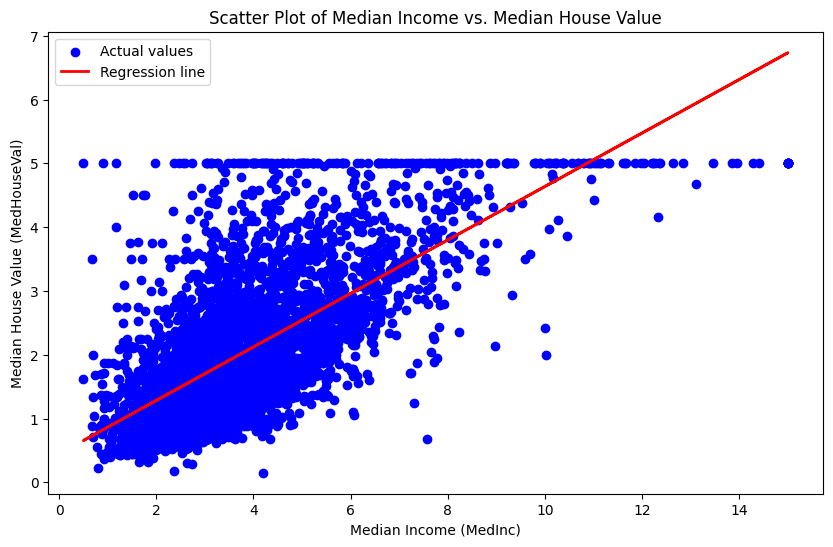

In [44]:
# -------------------------------------------
# Extract the 'MedInc' feature from the test set.
# We extract this separately because we want to visualize the relationship
# between Median Income and the actual house values on a 2D scatter plot.
med_inc_test = X_test['MedInc'].values

# Predict house values using the full trained model (all features + scaling).
# This is needed so we can compare actual vs predicted performance or visualize later.
y_test_pred = model.predict(X_test_scaled)


# -------------------------------------------
# Create a new Linear Regression model that uses ONLY the 'MedInc' feature.
# This simpler model helps visualize how one feature (MedInc) affects house prices.
single_feature_model = LinearRegression()

# Fit the simple model using only 'MedInc' from the training set.
# This lets us plot a clean regression line on the scatter plot.
single_feature_model.fit(X_train[['MedInc']], y_train)

# Predict values using the single-feature model on the test set.
# These predictions form the regression line we will draw on the scatter plot.
y_pred_single = single_feature_model.predict(X_test[['MedInc']])


# -------------------------------------------
# Start creating the scatter plot.
# We choose a larger figure size for clearer visualization.
plt.figure(figsize=(10, 6))

# Plot actual data points: MedInc vs Actual house values.
# Scatter plots help us observe the pattern (linearity) between two variables.
plt.scatter(med_inc_test, y_test, color='blue', label='Actual values')

# Plot the regression line predicted from the single-feature model.
# This line shows the linear relationship learned between MedInc and house values.
plt.plot(med_inc_test, y_pred_single, color='red', linewidth=2, label='Regression line')

# Label the x-axis to indicate what feature we are analyzing.
plt.xlabel('Median Income (MedInc)')

# Label the y-axis to indicate the target variable.
plt.ylabel('Median House Value (MedHouseVal)')

# Add a title so viewers understand what this graph represents.
plt.title('Scatter Plot of Median Income vs. Median House Value')

# Add a legend to differentiate actual data points and regression line.
plt.legend()

# Display the final scatter plot with the fitted line.
plt.show()


**Now calculate Residuals**

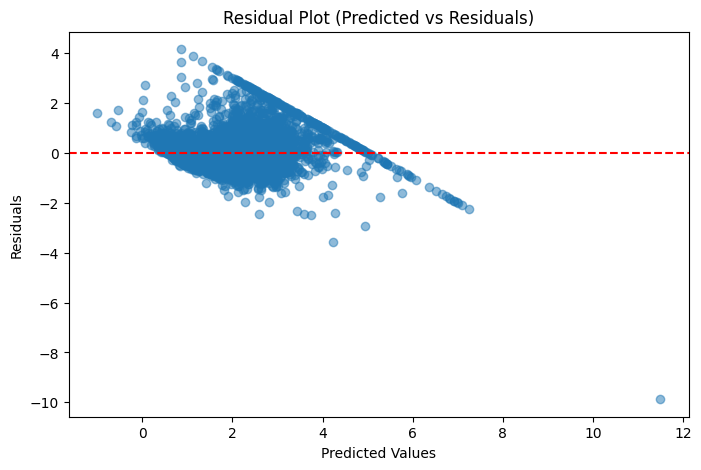

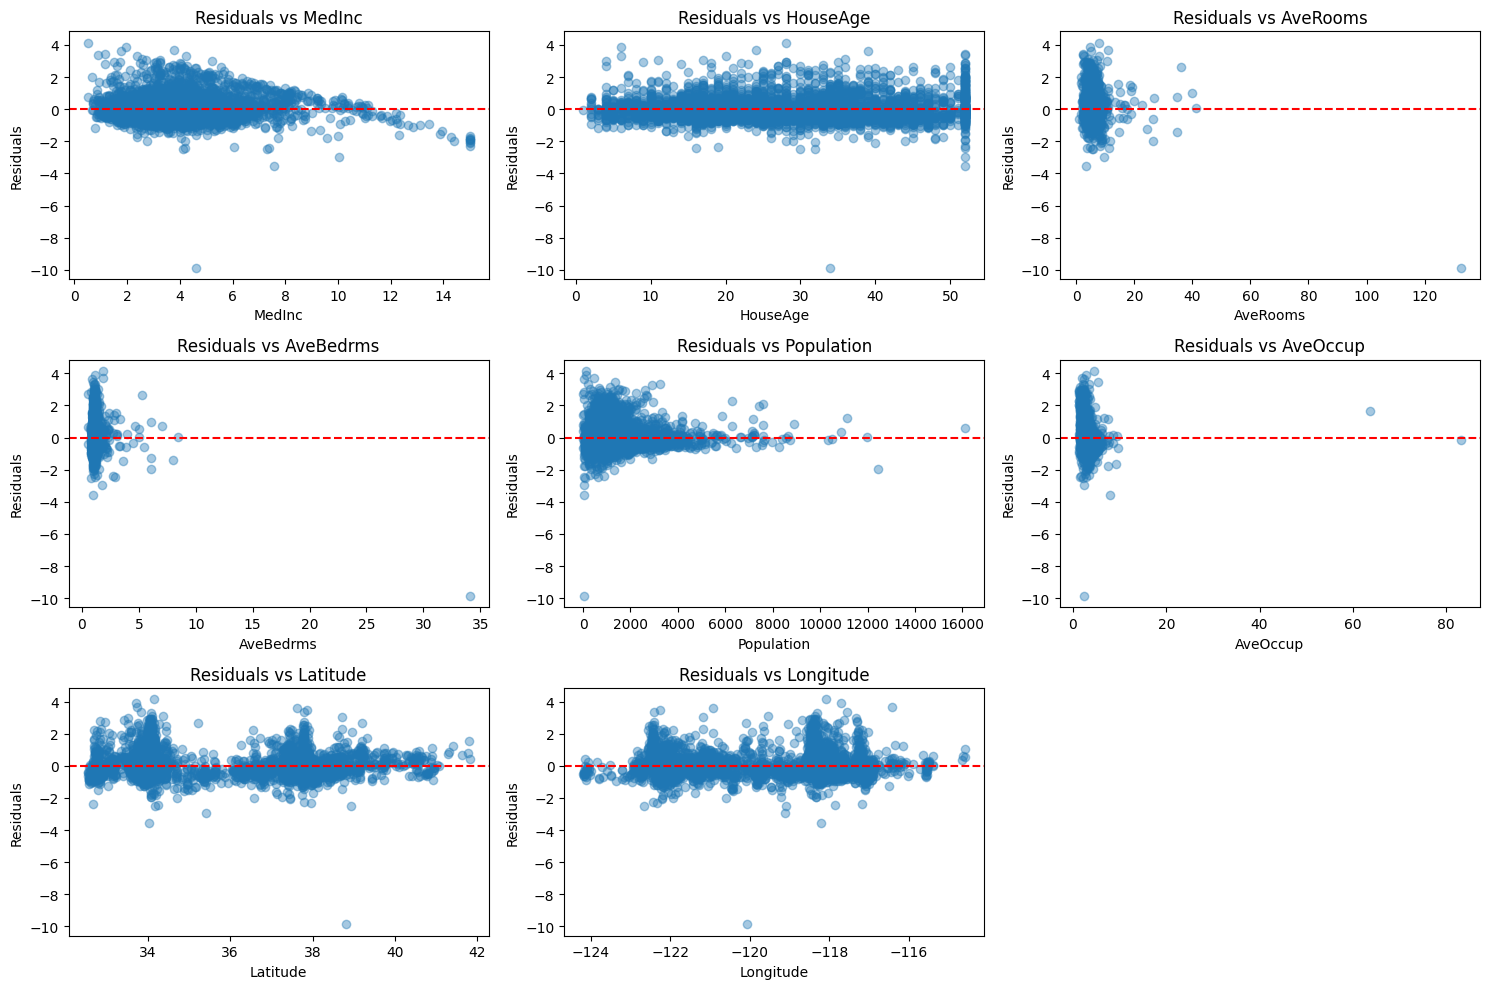

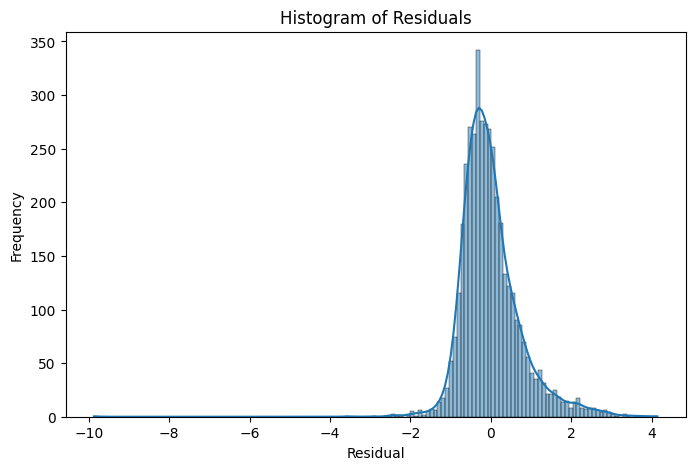

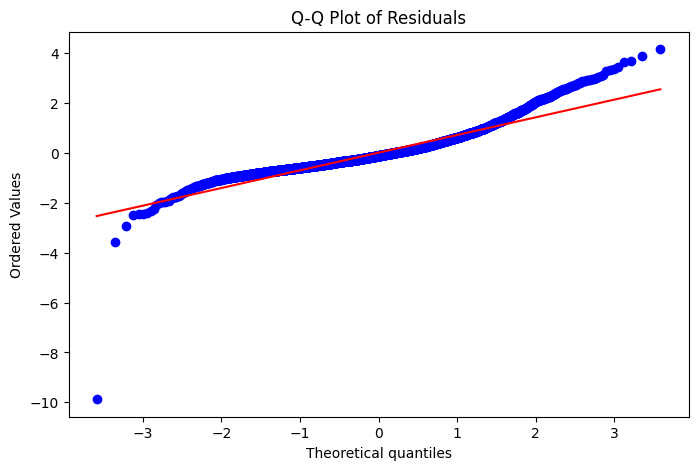

In [45]:
# ------------------------------------------------------------
# 1. CALCULATE RESIDUALS
# ------------------------------------------------------------

# Residuals = Actual values - Predicted values
# Helps evaluate model error patterns.
residuals = y_test - y_test_pred



# ------------------------------------------------------------
# 2. RESIDUAL PLOT (PREDICTED vs RESIDUALS)
# ------------------------------------------------------------

# Create a plot to check homoscedasticity (constant variance of errors).
plt.figure(figsize=(8, 5))

# Plot predicted values versus residuals (sizes match: both length = test samples).
plt.scatter(y_test_pred, residuals, alpha=0.5)

# Add a horizontal zero line to check if residuals are centered.
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Predicted vs Residuals)")
plt.show()



# ------------------------------------------------------------
# 3. RESIDUALS vs EACH FEATURE (CORRECTED)
# ------------------------------------------------------------

# Use only X_test so feature length = residual length
plt.figure(figsize=(15, 10))

# Loop through each column in X_test
for i, col in enumerate(X_test.columns, 1):

    # Create a subplot for each feature
    plt.subplot(3, 3, i)

    # Scatter feature values vs residuals
    plt.scatter(X_test[col], residuals, alpha=0.4)

    # Add zero line for reference
    plt.axhline(y=0, color='red', linestyle='--')

    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs {col}")

plt.tight_layout()
plt.show()



# ------------------------------------------------------------
# 4. HISTOGRAM OF RESIDUALS
# ------------------------------------------------------------

# Plot histogram to check normality of residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)

plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()



# ------------------------------------------------------------
# 5. Q-Q PLOT FOR NORMALITY
# ------------------------------------------------------------

import scipy.stats as stats

# Q-Q plot compares residual distribution vs normal distribution
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)

plt.title("Q-Q Plot of Residuals")
plt.show()



✅ What *residuals* are
✅ Why residuals matter in regression
✅ Interpretation of **each** residual-related plot



# ⭐ **What Are Residuals?**

Residuals = **Difference between actual value and predicted value**

[
Residual = y_actual - y_predicted
]

Example:

* Actual house price = **3.0**
* Model predicts = **2.6**

Residual = **3.0 – 2.6 = +0.4**

### ✔ Residual > 0

Model **under-predicted** the value.

### ✔ Residual < 0

Model **over-predicted** the value.

### ✔ Residual = 0

Perfect prediction.



# ⭐ **Why Residuals Are Important? (Very Important in Regression)**

Residual analysis helps verify **linear regression assumptions**:

1. Linearity
2. Constant variance (Homoscedasticity)
3. Independence of errors
4. Normality of errors
5. No patterns left → Good model fit

Residual plots show whether the model is valid or broken.



# ⭐ **Interpretation of Each Residual Plot**



# 1️⃣ **Residual Plot: Predicted vs Residuals**

### **Purpose:**

Check:

✔ Linearity
✔ Constant variance
✔ Random error distribution

### **Interpretation:**

**GOOD MODEL → Random scatter around 0**

✔ Points evenly spread
✔ No curve
✔ No funnel shape
✔ No pattern

**BAD MODEL → Pattern in residuals**

❌ Curve → relationship *not linear*
❌ Funnel (small → big) → *heteroscedasticity*
❌ Clusters → missing variables
❌ Increasing spread → variance not constant

This plot is the **most important plot** in linear regression diagnostics.



# 2️⃣ **Residuals vs Each Feature**

### **Purpose:**

Check:

✔ Whether each feature has a linear relationship with target
✔ Whether residuals vary with feature values
✔ Detect feature-specific problems

### **Interpretation:**

**GOOD → Residuals randomly scattered for each feature**
Means the model is capturing the relationship correctly.

**BAD cases:**

❌ *Curved pattern* → Feature needs transformation (log, sqrt)
❌ *Residuals increase with feature size* → Not constant variance
❌ *Residuals cluster* → Missing interaction terms

If many features show patterns, the model may not be linear enough → try:

* Polynomial features
* Decision trees
* Random forest
* Gradient boosting
* Neural networks



# 3️⃣ **Histogram of Residuals**

### **Purpose:**

Check **normality** of residuals (needed for statistical reliability).

### **GOOD → Bell-shaped (Normal distribution)**

✔ Centered at 0
✔ Symmetric
✔ Smooth curve

### **BAD → Strong skew or peaks → indicates:**

❌ Outliers
❌ Model errors
❌ Missing important features
❌ Wrong relationship form

Machine learning models **do not require perfect normality**, but linear regression diagnostics do.



# 4️⃣ **Q-Q Plot (Quantile-Quantile Plot)**

### **Purpose:**

More strict test of normality.

### **Interpretation:**

**GOOD → Points lie on the diagonal line**
→ Residuals follow normal distribution (ideal for linear regression).

**BAD → Deviations show problems**

* **Upward curve** → right skew
* **Downward curve** → left skew
* **S-shaped** → heavy tails / outliers
* **Scattered points** → residuals far from normal

If Q-Q plot is very bad:

→ Try log transform of target
→ Use robust regression
→ Or switch to tree-based models


# ⭐ Summary (Easy to Copy-Paste Into Notes)

**Residuals = Actual − Predicted values.
They show model errors.**

Residual plots help check regression assumptions:

| Plot                          | What It Tests                | Good Pattern   | Bad Pattern                      |
| ----------------------------- | ---------------------------- | -------------- | -------------------------------- |
| **Predicted vs Residuals**    | Linearity & homoscedasticity | Random scatter | Curve, funnel, pattern           |
| **Residuals vs Each Feature** | Feature-linear relationship  | Random scatter | Curve, clusters, variance change |
| **Histogram**                 | Normality                    | Bell-shaped    | Skewed or heavy tails            |
| **Q-Q Plot**                  | Exact normality              | Points on line | S-curve, outliers                |



